In [1]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

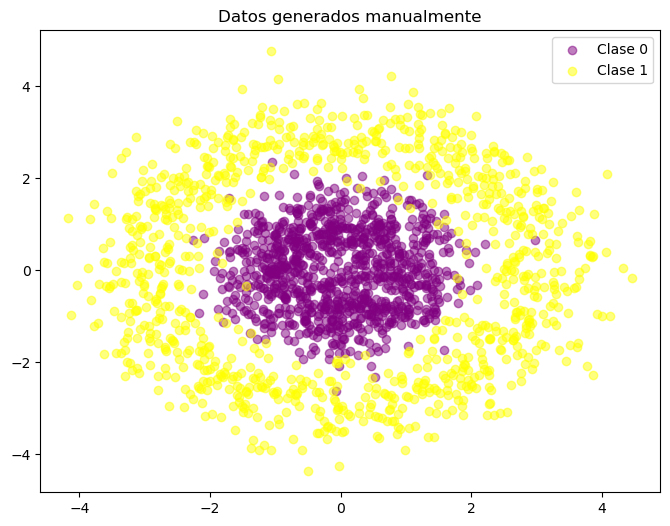

In [2]:
def make_classification(r0=1, r1=3, k=1000):
    """
    Creación de los datos
    """
    X1 = [np.array([r0*np.cos(t), r0*np.sin(t)]) for t in range(0,k)]
    X2 = [np.array([r1*np.cos(t), r1*np.sin(t)]) for t in range(0,k)]

    X = np.concatenate((X1,X2))
    n, d = X.shape
    Y = np.zeros(2*k)
    Y[k:] += 1
    noise = np.array([np.random.normal(0,1,2) for i in range(n)])
    X += 0.5*noise

    return X, Y

X, y = make_classification(r0=1, r1=2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X, y = make_classification(r0=1, r1=3)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:,1], color='purple', label='Clase 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1], color='yellow', label='Clase 1', alpha=0.5)
plt.title('Datos generados manualmente')
plt.legend()
plt.show()

In [3]:
# Ejemplo de uso
def test_backprop():
    # Creamos datos de ejemplo
    x = Variable(x_train)
    y_true = y_train  # One-hot encoding para 2 clases
    
    # Creamos una capa lineal
    linear = Linear(2, 2)
    
    # Forward pass
    hidden = linear(x)
    softmax = Softmax()
    output = softmax(hidden)
    
    # Calculamos la pérdida
    criterion = CrossEntropy()
    loss = criterion(y_true, output)
    
    # Backward pass
    loss.backward()
    
    # Verificamos que los gradientes se han calculado
    print("Gradiente en la salida:", output.gradiente)
    print("Gradiente en la capa oculta:", hidden.gradiente)
    print("Gradiente en la entrada:", x.gradiente)

In [4]:
test_backprop()

Gradiente en la salida: [[-7.09227774e-04 -5.05794008e-06]
 [ 3.15241299e-05  6.82761584e-04]
 [-1.99887657e-06 -7.12286838e-04]
 ...
 [-7.14097199e-04 -1.88514835e-07]
 [ 1.48401473e-04  5.65884242e-04]
 [ 1.98814074e-04  5.15471640e-04]]
Gradiente en la capa oculta: [[-7.09227774e-04 -5.05794008e-06]
 [ 3.15241299e-05  6.82761584e-04]
 [-1.99887657e-06 -7.12286838e-04]
 ...
 [-7.14097199e-04 -1.88514835e-07]
 [ 1.48401473e-04  5.65884242e-04]
 [ 1.98814074e-04  5.15471640e-04]]
Gradiente en la entrada: [[ 1.40023080e-03  1.19936620e-03]
 [ 2.12168959e-05  7.00440868e-04]
 [-8.31445594e-05 -7.83209029e-04]
 ...
 [ 1.41044416e-03  1.21301666e-03]
 [-2.23927174e-04  3.72798538e-04]
 [-3.29664950e-04  2.31476858e-04]]


In [18]:
def test_backprop_complex():
    #datos de entrada
    x = Variable(x_train)
    y_true = y_train

    #definimos la arquitectura
    #capa1: 2 neuronas entrada -> 4 neuronas ocultas
    linear1 = Linear(input_size=2, output_size=4)
    tanh = Tanh()

    # capa2: 4 neuronas ocultas -> 3 neuronas ocultas
    linear2 = Linear(input_size=4, output_size=3)
    relu = ReLU()

    # capa3: 3 neuronas -> 2 neuronas de salida
    linear3 = Linear(input_size=3, output_size=2)
    softmax = Softmax()

    # Forward pass
    # primera capa oculta con tanh
    hidden1 = linear1(x)
    hidden1_act = tanh(hidden1)

    # segunda capa oculta con ReLU
    hidden2 = linear2(hidden1_act)
    hidden2_act = relu(hidden2)

    # capa de salida con softmax
    output_linear = linear3(hidden2_act)
    output = softmax(output_linear)

    # calculamos la perdida
    criterion = CrossEntropy()
    loss = criterion(y_true, output)

    #backward pass
    loss.backward()

    # Imprimimos los resultados
    #print("\nResultados del forward pass:")
    #print("Salida de la red:", output.out)
    #print("Pérdida:", loss.out)
    #print("--------------------------------------------------")
    #print("\nPesos y gradientes de las capas lineales:")
    #print("Capa 1:")
    #print("Gradiente de los pesos:", linear1.grad_w)
    #print("Gradiente del bias:", linear1.grad_b)

    grads ={
        "W1":linear1.grad_w, "b1":linear1.grad_b,
        "W2":linear2.grad_w, "b2":linear2.grad_b,
        "w3":linear3.grad_w, "b3":linear3.grad_b
    }

    return grads

In [30]:
grads = test_backprop_complex()
grads["b3"]

array([-3.03002983e-05,  4.15247881e-05])

In [20]:
import numpy as np
epsilon = 1e-15
a = np.clip(activacion_sigmoidal.out, epsilon, 1-epsilon)
gradiente = np.where(y_train.reshape(-1,1) == 1, -1/a, 1/(1-a))

In [21]:
gradiente

array([[ 2.72072925],
       [ 2.52073265],
       [-1.49254106],
       ...,
       [-1.21456898],
       [ 2.08290164],
       [-1.14843166]])

In [24]:
c = activacion_sigmoidal.out * (1 - activacion_sigmoidal.out)
c * gradiente

array([[ 0.63245148],
       [ 0.60328994],
       [-0.33000168],
       ...,
       [-0.17666266],
       [ 0.51990052],
       [-0.12924727]])